In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [123]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/diamond_pricing.csv'
df = pd.read_csv(url)
df.head()

,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339


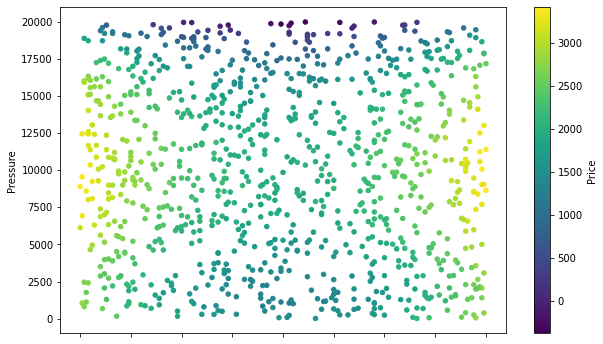

In [124]:
df.plot(kind='scatter',
    x='Paleonium',y='Pressure',c='Price',cmap='viridis',figsize=(10,6))
plt.show()

<AxesSubplot:>

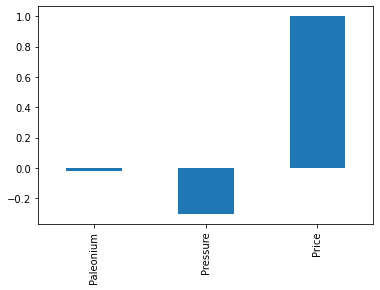

In [125]:
df.corrwith(df['Price']).plot(kind='bar')

#### simple impln

In [126]:
X = df.drop('Price',axis=1).values
y = df['Price'].values

In [127]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.25, random_state=0)

In [128]:
model = make_pipeline(StandardScaler(),DecisionTreeRegressor())

In [129]:
model.fit(xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [130]:
print("Testing Metrics")
ypred = model.predict(xtest)
print(f'score : {r2_score(ytest, ypred):.4}')
print(f'mse : {mean_squared_error(ytest, ypred):.4}')
print(f'mae : {mean_absolute_error(ytest, ypred):.4}')

Testing Metrics
score : 0.96
mse : 1.696e+04
mae : 99.49


In [131]:
print("Training Metrics")
ypred = model.predict(xtrain)
print(f'score : {r2_score(ytrain, ypred):.4}')
print(f'mse : {mean_squared_error(ytrain, ypred):.4}')
print(f'mae : {mean_absolute_error(ytrain, ypred):.4}')

Training Metrics
score : 1.0
mse : 0.0
mae : 0.0


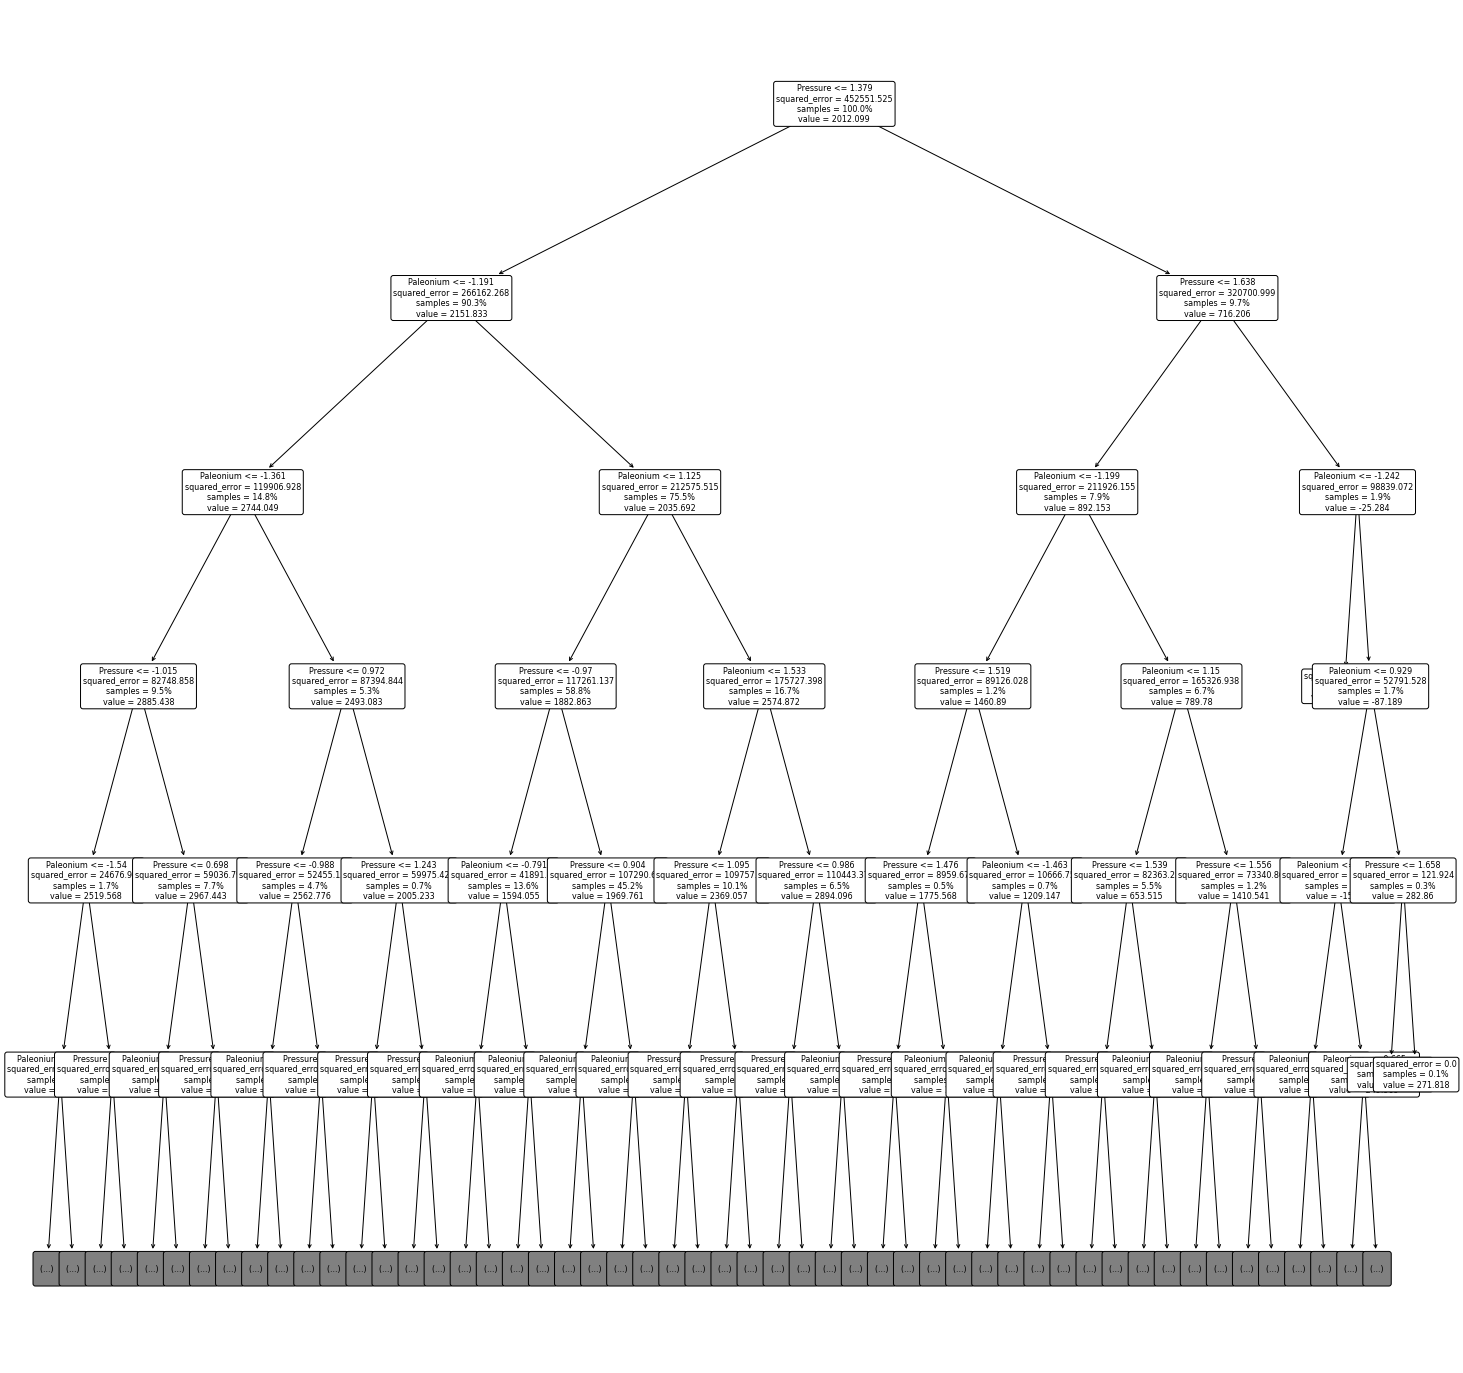

In [132]:
plt.figure(figsize=(25,25))
plot_tree(model.get_params()['decisiontreeregressor'], 
            max_depth=5,
            feature_names=['Paleonium','Pressure'],
            fontsize=8, proportion=True, rounded=True)
plt.show()

### cross validate

In [133]:
ss = ShuffleSplit(n_splits=50, test_size=.25)
model = make_pipeline(StandardScaler(),DecisionTreeRegressor(max_depth=15))

In [134]:
result = cross_validate(model, X, y, cv=ss, 
                        scoring=['neg_mean_absolute_error','r2'],
                        return_train_score=True,
                        return_estimator=True)
result = pd.DataFrame(result)
result['test_error'] = -result['test_neg_mean_absolute_error']
result['train_error'] = -result['train_neg_mean_absolute_error']
result

,fit_time,score_time,estimator,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2,test_error,train_error
0,0.002001,0.001001,"(StandardScaler(), DecisionTreeRegressor(max_d...",-93.798221,-9.179346,0.961311,0.998822,93.798221,9.179346
1,0.001000,0.001000,"(StandardScaler(), DecisionTreeRegressor(max_d...",-94.321946,-7.017847,0.968604,0.999013,94.321946,7.017847
2,0.000999,0.000000,"(StandardScaler(), DecisionTreeRegressor(max_d...",-95.538710,-5.806805,0.967053,0.999321,95.538710,5.806805
3,0.002001,0.000000,"(StandardScaler(), DecisionTreeRegressor(max_d...",-98.400197,-5.046377,0.948957,0.999523,98.400197,5.046377
4,0.002000,0.001001,"(StandardScaler(), DecisionTreeRegressor(max_d...",-98.476413,-4.995870,0.952641,0.999508,98.476413,4.995870
5,0.002000,0.001000,"(StandardScaler(), DecisionTreeRegressor(max_d...",-99.141810,-6.987076,0.965779,0.999168,99.141810,6.987076
6,0.002000,0.001000,"(StandardScaler(), DecisionTreeRegressor(max_d...",-96.909487,-5.337355,0.964196,0.999410,96.909487,5.337355
7,0.002002,0.001000,"(StandardScaler(), DecisionTreeRegressor(max_d...",-90.420851,-7.772667,0.953733,0.999054,90.420851,7.772667
8,0.002000,0.000000,"(StandardScaler(), DecisionTreeRegressor(max_d...",-102.441813,-4.819431,0.945477,0.999457,102.441813,4.819431
9,0.002001,0.000000,"(StandardScaler(), DecisionTreeRegressor(max_d...",-89.906426,-5.002883,0.966999,0.999448,89.906426,5.002883


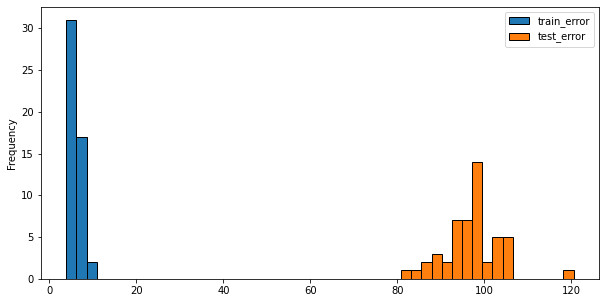

In [135]:
fig, ax = plt.subplots(figsize=(10,5))
result[['train_error','test_error']].plot(kind='hist',bins=50,ax=ax,edgecolor='black')
plt.show()

In [136]:
from sklearn.model_selection import validation_curve

In [137]:
max_depth_options = [5,10,15,25,50,100]
train_scores, test_scores = validation_curve(model,X,y,
                            param_name='decisiontreeregressor__max_depth',
                            param_range=max_depth_options,
                            cv=ss,
                            scoring='neg_mean_absolute_error',
                            n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores

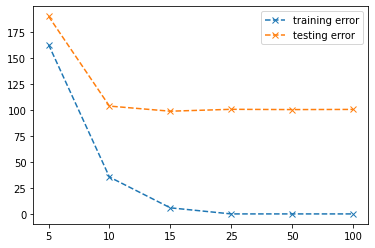

In [138]:
plt.plot(train_errors.mean(axis=1),'--x', label='training error',)
plt.plot(test_errors.mean(axis=1),'--x', label='testing error')
plt.xticks([0,1,2,3,4,5],max_depth_options)
plt.legend()
plt.show()